### **Lab 10: Gauss-Legendre Integration**


Lab Goals
*   Practice implementing Gauss-Quadrature
*   Using in-built functions in Python to determine the Gauss-Quadrature points and weights



#### **1. Mapping to Normalized Coordinates**

Given the integral:

$$I   =  \int_{-2}^{4} 3x^2+4\,\mathrm{d} x$$
where:
$$F(x) = 3x^2+4$$

Evaluate this integral by hand and write it down for later comparison.

Now, still by hand, map the integral from the given bounds of $x = [-2,4]$ into a normalized coordinate system with bounds of $\rho = [-1,1]$ using a linear mapping method, where $a$ is the lower bound and $b$ the upper bound of our original integral:

$$x = \frac{1}{2}(1 - \rho)a + \frac{1}{2}(1+\rho)b$$

The transformed integral should be

$$I = \int_{-1}^{1}[27\rho^2 + 18\rho + 7] \mathrm{d}x = \int_{-1}^{1} P(\rho)J\, \mathrm{d}\rho$$

where $J$ is the jacobian given by:

$$J = \frac{\mathrm{d}x}{\mathrm{d}\rho}$$

#### **2. Two Point Gauss-Legendre Quadrature**

Given that our integral is now given by:

$$I = \int_{-1}^{1}[27\rho^2 + 18\rho + 7]J\,\mathrm{d}\rho$$

Evaluate the integral by hand using 2 point Gauss-Legendre. The expression for the integral is given by:

$$I = \sum_{i = 0}^1 w_iP(\rho_i)J$$

where we know from tables that two-point Gauss-Legendre gives:

$$\rho = \left[-\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}}\right], \qquad w = [1,1]$$

In Python, write a function that accepts the following inputs:  

*   function handle of the unmapped function $F(x)$
*   the limits of the integral $a$ and $b$.

The function should and return the approximation of the integral using  2 pt. Gauss-Legendre Quadrature.

Do not forget to convert $x$ to $\rho$ using the coordinate mapping discussed in Problem 1. Also do not forget your Jacobian!!!



In [28]:
import numpy as np
from math import sqrt

# Starter Code
def F(x):
    return 3*x**2+4 # Function to be integrated

a = -2.
b = 4.

def TwoptGaussQuad(f,a,b):
    w = np.array([1, 1]) #weights are both 1
    rho = np.array([-1/sqrt(3), 1/sqrt(3)])

    x = .5*(1 - rho)*a + .5*(1 + rho)*b 
    J = (b - a)/2

    I_GL = 0 #summation initialization

    for i in range(len(rho)):
        I_GL += w[i]*f(x[i])
    I_GL *= J

    return I_GL

print(f"The solution of 2 point Gauss-Legendre is {TwoptGaussQuad(F, a, b)}")
print(f"The true analytical solution is 96.")

The solution of 2 point Gauss-Legendre is 96.0
The true analytical solution is 96.


#### **3. Three-Point Gauss-Legendre**

By hand try using three points! You can get the weights $w$ and integration points $\rho$ from the given NumPy function.



In [29]:
# Starter Code

import numpy as np

[rho, w] = np.polynomial.legendre.leggauss(3)

print(f"Rho : {rho}")
print(f"w : {w}")

Rho : [-0.77459667  0.          0.77459667]
w : [0.55555556 0.88888889 0.55555556]


#### **4. Higher Order Gauss-Legendre**

Modify your function from the previous segment to work for any number of points $n$.

Incorporate the built-in NumPy function that returns the weights and points that we used in part 3.

Test your integration for 3 points, 4 points, 5 points and 6 points on the function:

$$I = \int_{0}^{\pi} e^{2x}\cos(3x) \, \mathrm{d}x$$

whose analytical solution is:

$$I =  -\frac{2}{13}\left(1+e^{2\pi}\right)$$

Compare the error for each integration.

In [30]:
# Starter Code

def F2(x):
    return np.exp(2*x)*np.cos(3*x) # Function to be integrated

a = 0
b = np.pi

def gaussQuadrature(f,a,b,n):
    [rho, w] = np.polynomial.legendre.leggauss(n)

    x = .5*(1 - rho)*a + .5*(1 + rho)*b 
    J = (b - a)/2

    I_GL = 0 #summation initialization

    for i in range(len(rho)):
        I_GL += w[i]*f(x[i])

    I_GL *= J
        
    return I_GL

I_a = -(2/13)*(1 + np.exp(2*np.pi))

for n in range(3, 7):
    I = gaussQuadrature(F2, a, b, n)
    print(f"The solution using {n} porint Gauss-Legendre is {I}")

    error = abs(I - I_a)
    print(f"Error: {error}\n")

The solution using 3 porint Gauss-Legendre is -111.22554913564171
Error: 28.688371362601004

The solution using 4 porint Gauss-Legendre is -88.60625411624451
Error: 6.069076343203804

The solution using 5 porint Gauss-Legendre is -81.86749891924768
Error: 0.6696788537930303

The solution using 6 porint Gauss-Legendre is -82.52544019834322
Error: 0.011737574697491482



#### **5. Integrating Along the Length of a Curve**

Observe the following plot of one quarter of the unit circle.

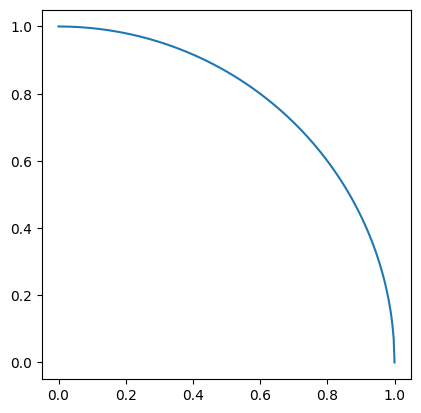

In [31]:
# Provided Code

import numpy as np
import matplotlib.pyplot as plt

xpts = np.append(np.linspace(0, 0.8, 81), np.linspace(0.8, 1.0, 81))
ypts = np.sqrt(1-xpts**2)
plt.plot(xpts,ypts)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()



We can also use Gauss-Legendre to integrate along the length of a curve such as this one. The expression for the arc length can be written as:

$$I = \int_{S_1}^{S_2} \mathrm{d}S = \int_{-1}^{1}J \mathrm{d}\rho$$

The Jacobian is given by:

$$J = \frac{\mathrm{d}s}{\mathrm{d}\rho} = \left[\left(\frac{\mathrm{d}x}{\mathrm{d}\rho} \right)^2 + \left(\frac{\mathrm{d}y}{\mathrm{d}\rho} \right)^2\right]^{\frac{1}{2}}$$

Conceptual question: **Why is this the Jacobian?**

Lets use a second order coordinate mapping of $x$ and $y$ given by:

$$ N = \left[ \frac{1}{2}\rho(\rho-1), \quad -\rho^2 + 1, \, \quad \frac{1}{2}\rho(\rho+1) \right]^T$$

This means we have both $x$ and $y$ in terms of $\rho$ (a parameterization). This is the same thing as our equation for the linear mapping, but there, we only had two points (the endpoints, $x_0=a$ and $x_1=b$). With three points, it looks like this:

$$x(\rho)=\sum_{i=0}^2x_iN_i, \qquad y(\rho)=\sum_{i=0}^2y_iN_i$$

This means we will need three points in $x$ and $y$. Our second order mapping is mapping these points to $\rho$ values of $-1, 0,$ and $1$. **What $x$ and $y$ values should we choose along the arc?**

Furthermore, notice that we only have $J$ in the integrand! That means we only need $\frac{\mathrm{d}x}{\mathrm{d}\rho}$ and $\frac{\mathrm{d}y}{\mathrm{d}\rho}$, not $x$ or $y$. **How can we define these derivatives?**

$$\frac{\mathrm{d}x}{\mathrm{d}\rho} = \frac{\mathrm{d}x}{\mathrm{d}N}\frac{\mathrm{d}N}{\mathrm{d}\rho}, \qquad \frac{\mathrm{d}y}{\mathrm{d}\rho} = \frac{\mathrm{d}y}{\mathrm{d}N}\frac{\mathrm{d}N}{\mathrm{d}\rho}$$

We will use this to find the arc length of a quarter of the unit circle. **What is the analytical solution? How does it compare to our integration?**

In [32]:
# Starter Code



In [33]:
# Solution when paramaterized normally (i.e., we know the function)
# This is NOT the approach we are using in the above code cell

def fqtrcir(theta):  # In polar coordinates, and we know r = 1
  return 1

gaussQuadrature(fqtrcir, 0, np.pi/2, 1)  # Make sure you define this function!

1.5707963267948966